# LOAN PREDICTIVE MODEL

- The model  aims to predict the likelihood of a loan application being approved or rejected based on historical data and applicant characteristics. Thus to enhance decision-making processes, reduce risk, and improve customer experience by providing accurate predictions of loan approval outcomes.

- Import all Necessary Dependencies

In [110]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [39]:
loan = pd.read_csv('loan_prediction.csv')

In [40]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# Dropping the Loan_ID Column of the dataset

loan = loan.drop('Loan_ID', axis = 1)

In [11]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
# Checkimg for the dataset information

loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [42]:
# Checking out for Null Values

loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
# Statistical information of dataset

loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- Filling in the Missing Values

In [44]:
# Filling the Categorical Features with the mode;

loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)

In [45]:
# Fill missing values  in Loan_Amount witht he Median of the column
loan['LoanAmount'].fillna(loan['LoanAmount'].median(), inplace=True)

# Fill missing values in Loan_Amount_Term with the Mode
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)

# Fill missing values in Credit_History with the mode
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)

- Exploratory Data Analysis (EDA)

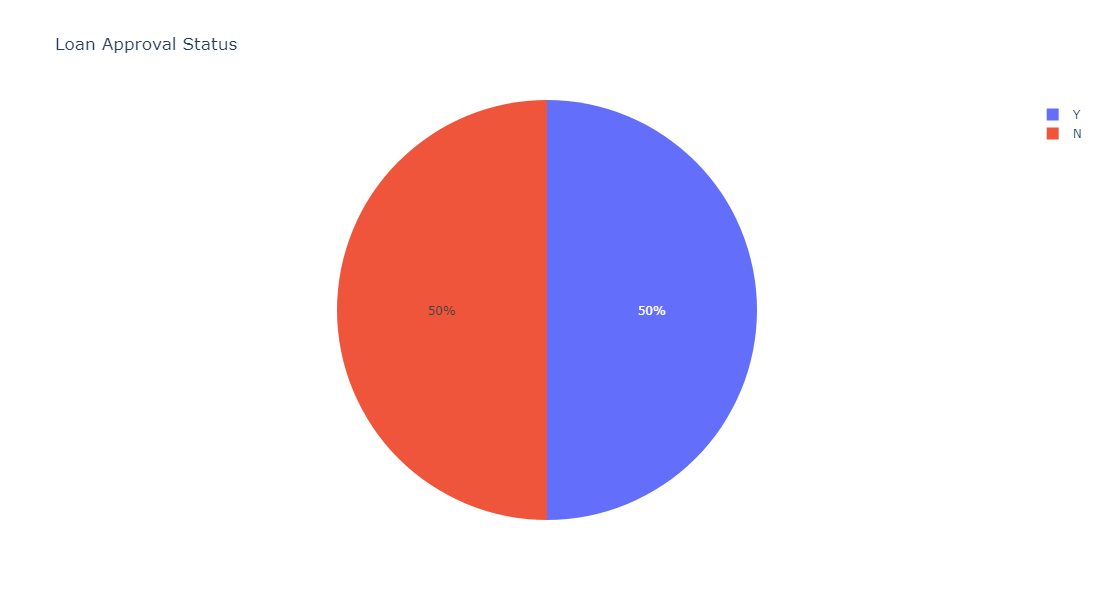

In [46]:
loan_status_count = loan['Loan_Status'].value_counts()
fig_loan_status = px.pie(loan_status_count, names = loan_status_count.index, title ='Loan Approval Status')
fig_loan_status.update_layout(width = 600, height = 600)

fig_loan_status.show()

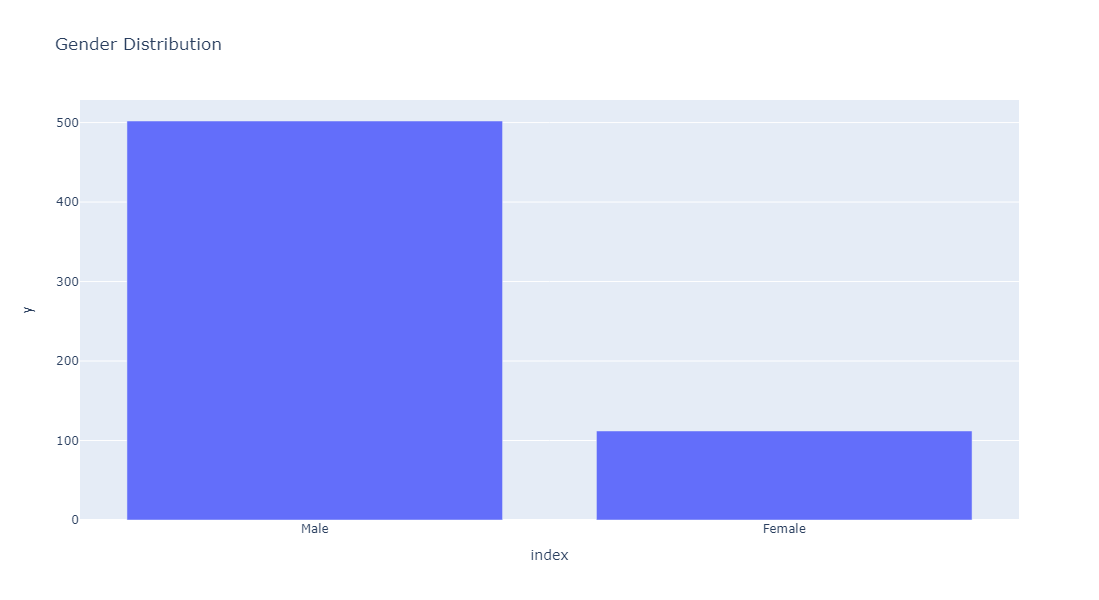

In [47]:
gender_count = loan['Gender'].value_counts()
fig_gender = px.bar(gender_count, x = gender_count.index, y = gender_count.values, title = 'Gender Distribution')
fig_gender.update_layout(width = 1000, height = 600)

fig_gender.show()

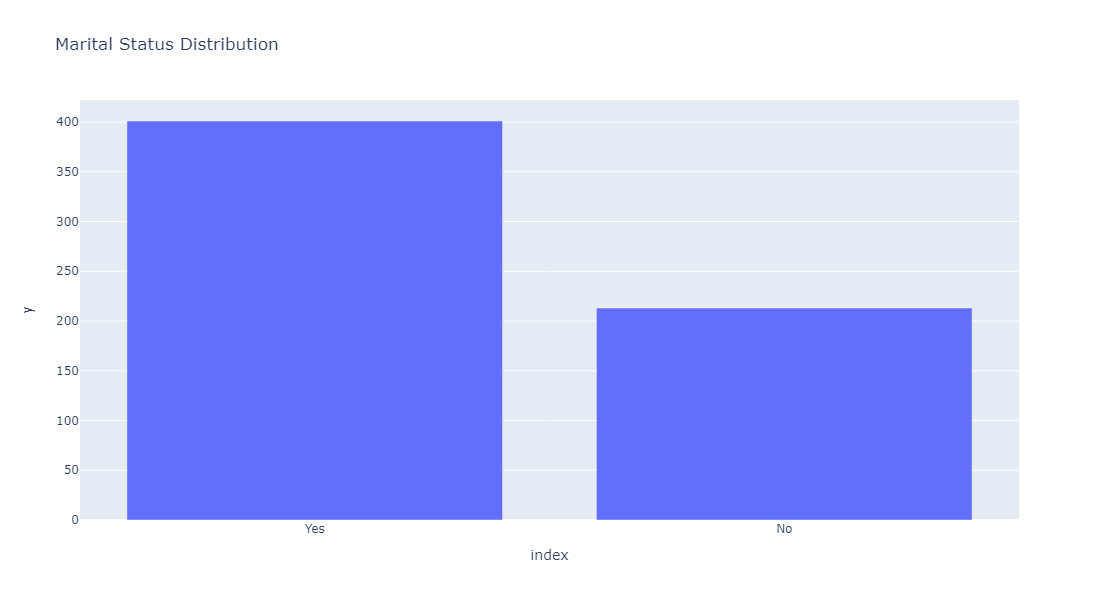

In [49]:
married_count = loan['Married'].value_counts()
fig_married = px.bar(married_count, x = married_count.index, y = married_count.values, title = 'Marital Status Distribution')
fig_married.update_layout(width = 1000, height = 600)

fig_married.show()

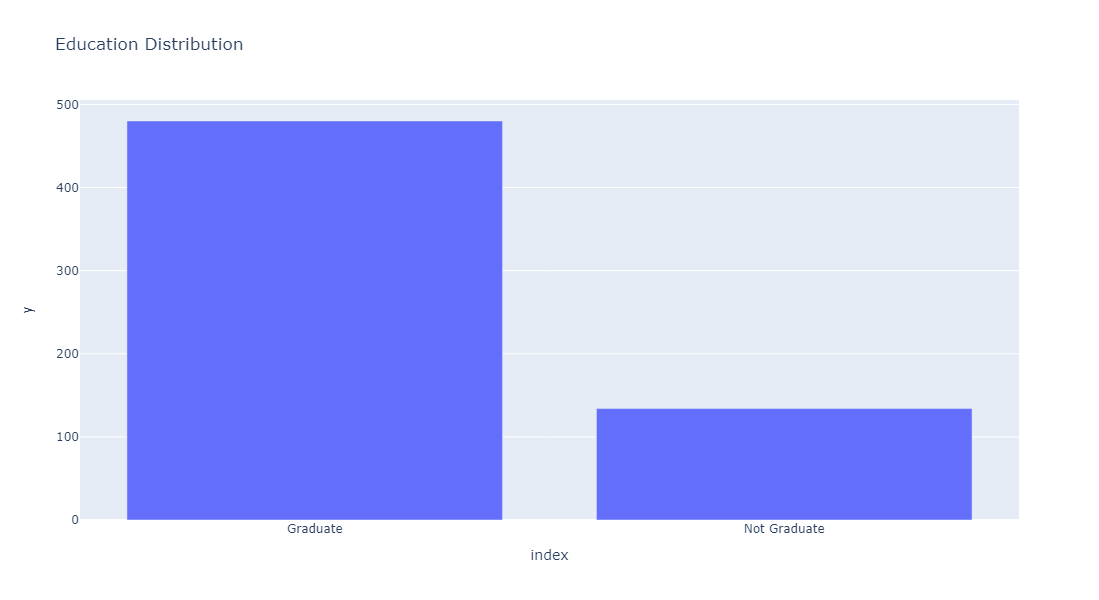

In [50]:
education_count = loan['Education'].value_counts()
fig_education = px.bar(education_count, x = education_count.index, y = education_count.values, title = 'Education Distribution')
fig_education.update_layout(width = 1000, height = 600)

fig_education.show()

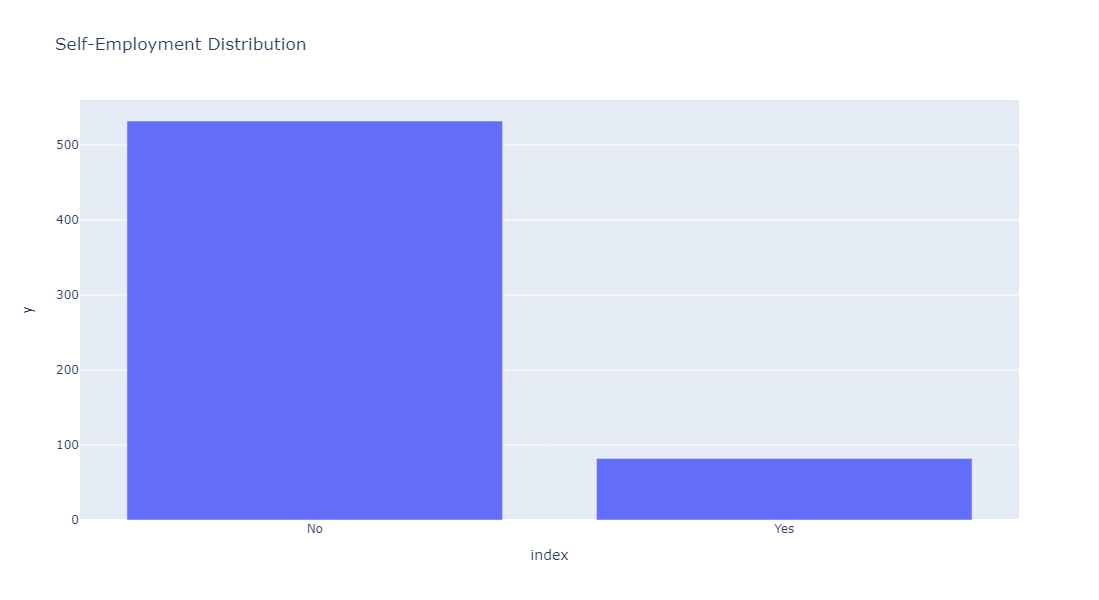

In [51]:
self_employed_count = loan['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count, x=self_employed_count.index, y=self_employed_count.values, title='Self-Employment Distribution')
fig_self_employed.update_layout(width = 1000, height = 600)

fig_self_employed.show()

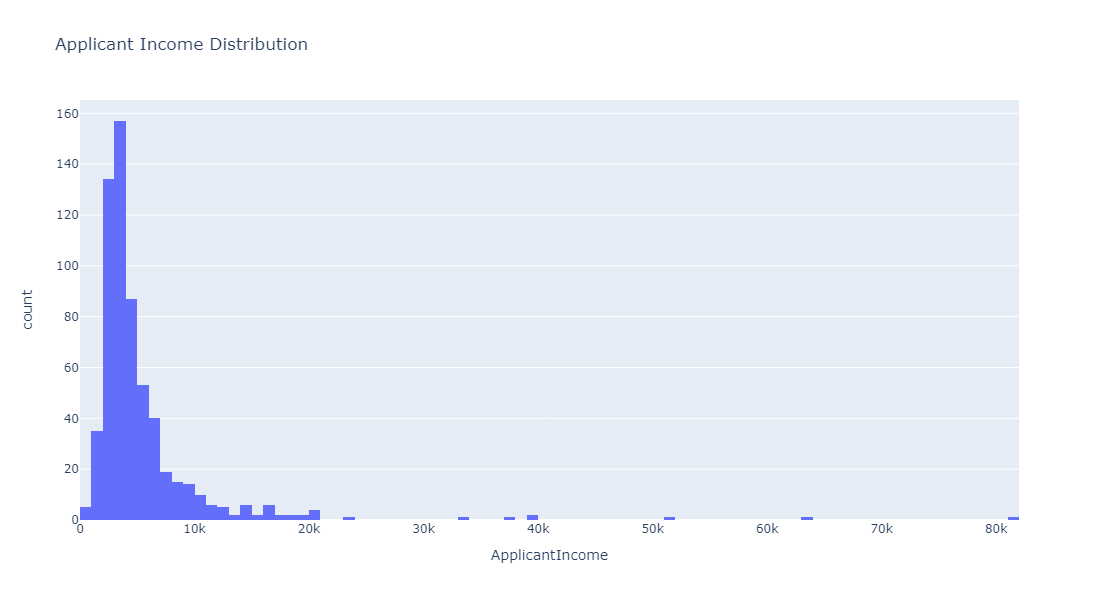

In [54]:
fig_applicant_income = px.histogram(loan, x='ApplicantIncome', title='Applicant Income Distribution')
fig_applicant_income.update_layout(width = 1000, height = 600)

fig_applicant_income.show()

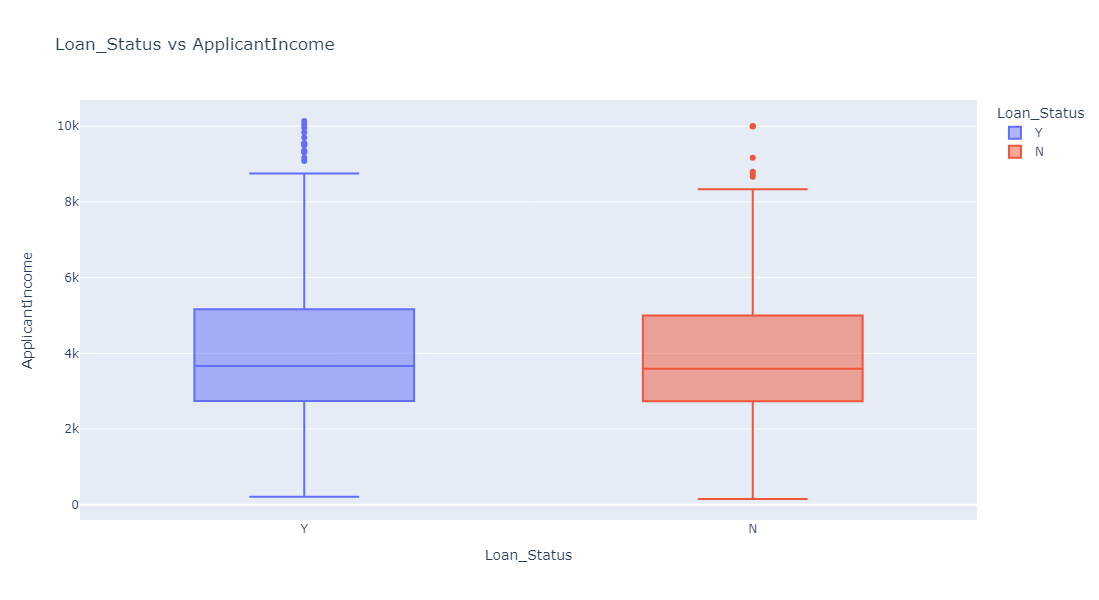

In [62]:
# Relationship between 'Loan_Status' vs 'ApplicantIncome'

fig_income = px.box(loan, x='Loan_Status', y ='ApplicantIncome', color ="Loan_Status", title ='Loan_Status vs ApplicantIncome')
fig_income.update_layout(width = 1000, height = 600)

fig_income.show()

- Dealing with Outliers in the “ApplicantIncome” column.

In [63]:
# Calculate the IQR
Q1 = loan['ApplicantIncome'].quantile(0.25)
Q3 = loan['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

In [64]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [65]:
# Remove outliers

loan = loan[(loan['ApplicantIncome'] >= lower_bound) & (loan['ApplicantIncome'] <= upper_bound)]

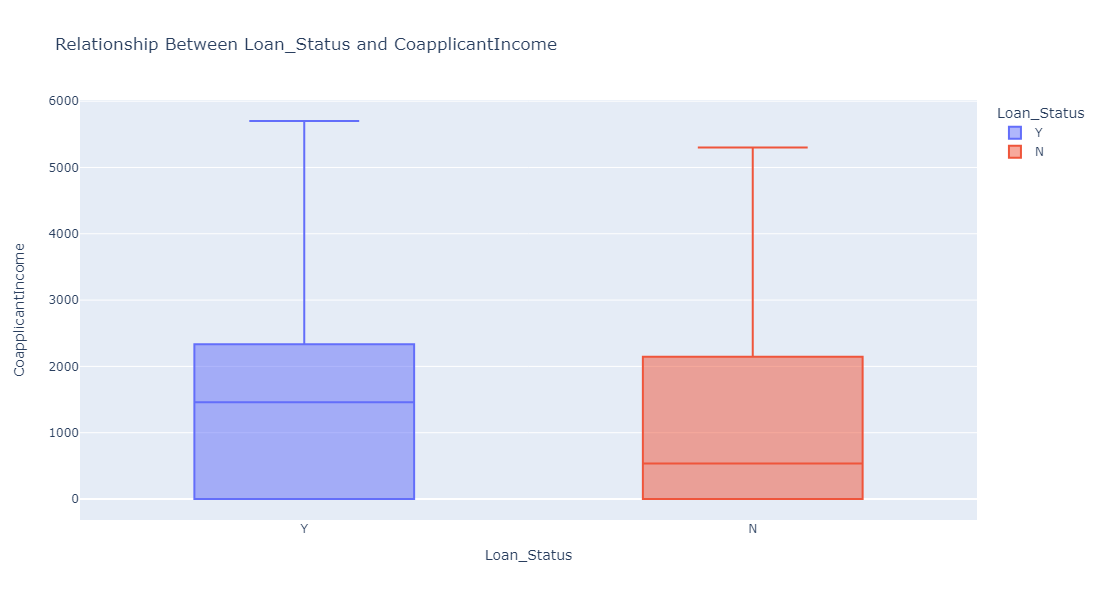

In [71]:
# Relationship between the income of the loan co-applicant and the loan status:

fig_coapplicant_income = px.box(loan, x='Loan_Status', y ='CoapplicantIncome', color ="Loan_Status", title='Relationship Between Loan_Status and CoapplicantIncome')
fig_coapplicant_income.update_layout(width = 1000, height = 600)

fig_coapplicant_income.show()

In [72]:
# Calculate the IQR
Q1 = loan['CoapplicantIncome'].quantile(0.25)
Q3 = loan['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

In [73]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [74]:
# Remove outliers
loan = loan[(loan['CoapplicantIncome'] >= lower_bound) & (loan['CoapplicantIncome'] <= upper_bound)]

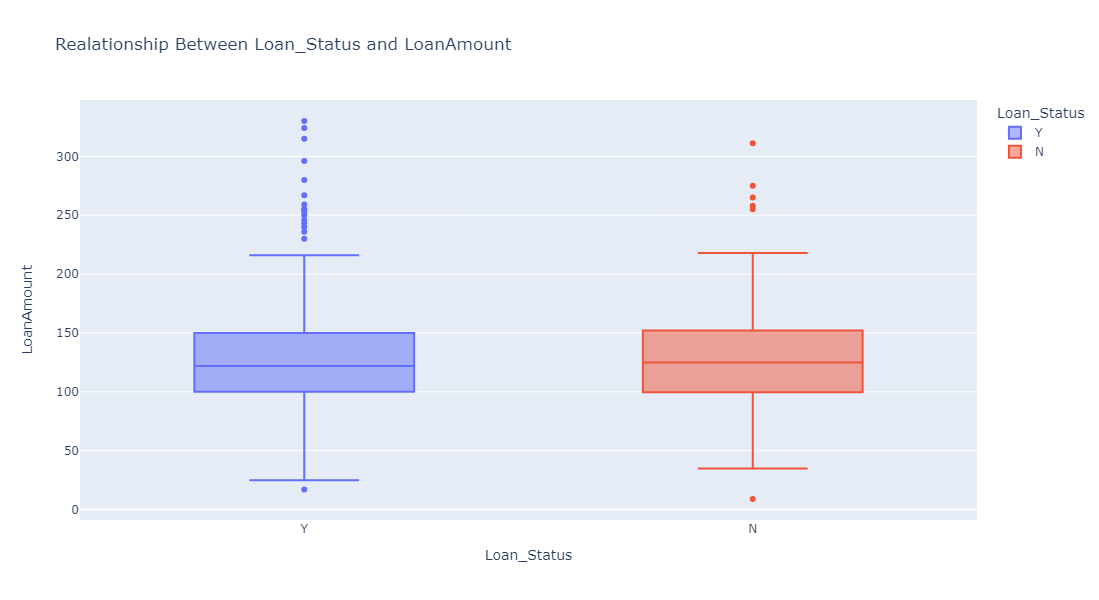

In [70]:
fig_loan_amount = px.box(loan, x='Loan_Status', y='LoanAmount', color="Loan_Status", title='Realationship Between Loan_Status and LoanAmount')
fig_loan_amount.update_layout(width = 1000, height = 600)

fig_loan_amount.show()

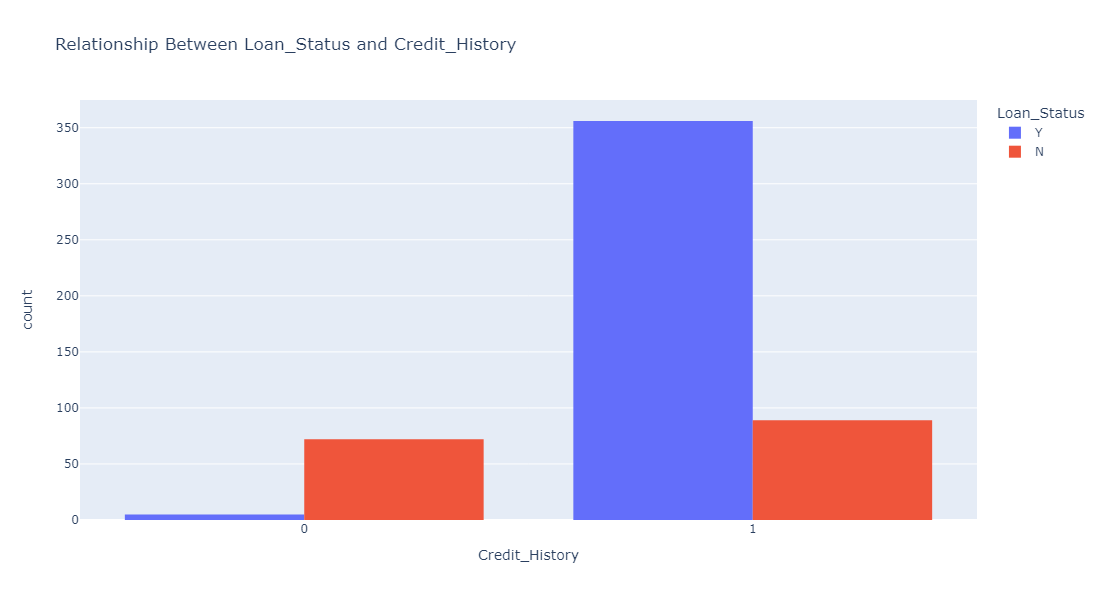

In [75]:
fig_credit_history = px.histogram(loan, x='Credit_History', color='Loan_Status', barmode='group', title='Relationship Between Loan_Status and Credit_History')
fig_credit_history.update_layout(width = 1000, height = 600)

fig_credit_history.show()

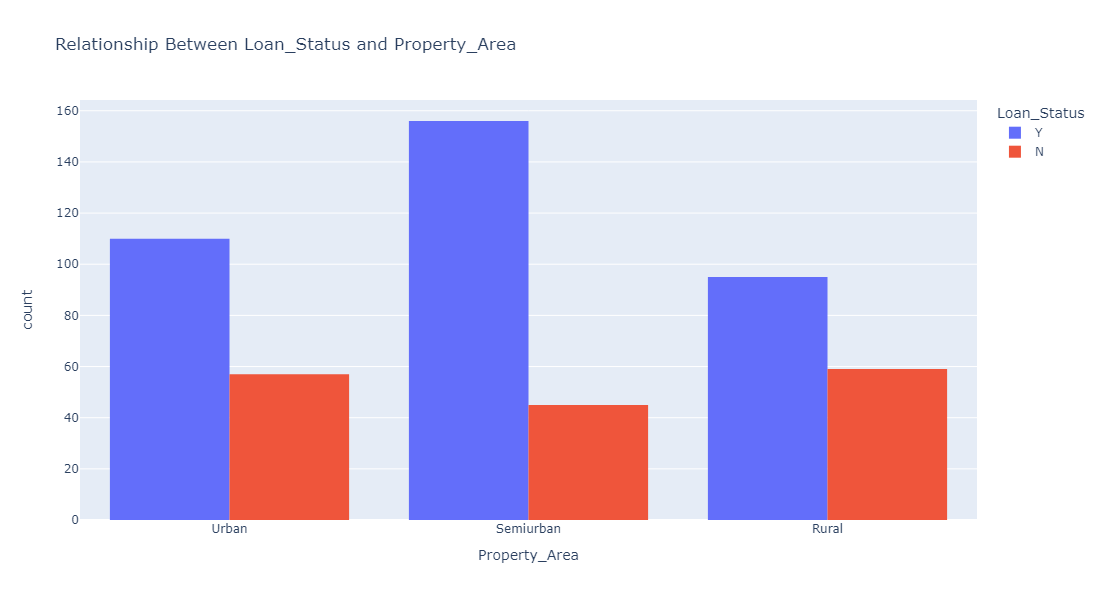

In [76]:
fig_property_area = px.histogram(loan, x='Property_Area', color='Loan_Status', barmode='group', title='Relationship Between Loan_Status and Property_Area')
fig_property_area.update_layout(width = 1000, height = 600)

fig_property_area.show()

- Data Preparation and Training Loan Approval Prediction Model

  - convert categorical columns into numerical ones;
  - split the data into training and test sets;
  - scale the numerical features;
  - train the loan approval prediction model.

In [77]:
# Convert categorical columns into numerical ones;

cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
loan = pd.get_dummies(loan, columns = cat_cols)

In [81]:
# Split the data into training and test sets;

X = loan.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = loan['Loan_Status']

In [82]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [83]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [84]:
# Split the data into training and testing sets;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [85]:
# Scale the numerical columns using StandardScaler

scaler = StandardScaler()

In [86]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [87]:
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [92]:
# Defining the model;

svc_model = SVC(random_state = 101)

In [93]:
svc_model.fit(X_train, y_train)

SVC(random_state=101)

In [94]:
svc_pred = svc_model.predict(X_test)

In [96]:
# svc_pred

In [105]:
# RandomForest Model

rf_model = RandomForestClassifier(random_state = 101)

In [106]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [107]:
rf_pred = rf_model.predict(X_test)

In [109]:
# rf_pred

- Evaluating The Model

In [112]:
print('Classifcation Report for SVC Model: ')
print(classification_report(y_test, svc_pred))

Classifcation Report for SVC Model: 
              precision    recall  f1-score   support

           N       0.95      0.48      0.64        44
           Y       0.83      0.99      0.90       113

    accuracy                           0.85       157
   macro avg       0.89      0.73      0.77       157
weighted avg       0.86      0.85      0.83       157



In [113]:
print('Classifcation Report for RandomForest Model: ')
print(classification_report(y_test, rf_pred))

Classifcation Report for RandomForest Model: 
              precision    recall  f1-score   support

           N       0.85      0.50      0.63        44
           Y       0.83      0.96      0.89       113

    accuracy                           0.83       157
   macro avg       0.84      0.73      0.76       157
weighted avg       0.84      0.83      0.82       157



# Final Model

In [114]:
final_model = SVC(random_state = 101)

In [115]:
final_model.fit(X, y)

SVC(random_state=101)

In [116]:
# Saving the Model

import joblib

In [118]:
joblib.dump(final_model, 'loan_predictive_model.pkl')

['loan_predictive_model.pkl']

In [120]:
list(X.columns)

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [121]:
# Saving the column Names

joblib.dump(list(X.columns), 'col_names.pkl')

['col_names.pkl']

In [122]:
# Load and Test The Model
loaded_col = joblib.load('col_names.pkl')

In [123]:
loaded_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [124]:
loaded_model = joblib.load('loan_predictive_model.pkl')

In [125]:
loaded_model

SVC(random_state=101)